In [42]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.size'] = 20
plt.style.use('ggplot')

%matplotlib inline

pd.set_option('display.max_colwidth', -1)

In [6]:
data = pd.read_csv('../../documents/data/nyc_restaurants.csv')

# First Look

In [13]:
data.shape

(385670, 18)

In [14]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50000598,UNCLE TED'S,MANHATTAN,163,BLEECKER STREET,10012.0,2127771395,Chinese,10/03/2016,Violations were cited in the following area(s).,04N,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",Critical,46.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
1,50000786,DUNKIN' DONUTS,BROOKLYN,873,FLATBUSH AVENUE,11226.0,7189400080,Donuts,12/14/2017,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil ware washing operation.,Not Critical,10.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
2,41703747,M2N BUFFET,QUEENS,4012,82 STREET,11373.0,7188032488,American,01/27/2016,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,21.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection


In [15]:
data.columns


Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [7]:
data_names = ['id', 'name', 'location','bldg_num','street','zipcode','phone','cuisine','inspect_date','action','violation_code','violation_desc','critical_flag','score','grade','grade_date','record_date','inspect_type']
data.columns = data_names

data.columns

Index(['id', 'name', 'location', 'bldg_num', 'street', 'zipcode', 'phone',
       'cuisine', 'inspect_date', 'action', 'violation_code', 'violation_desc',
       'critical_flag', 'score', 'grade', 'grade_date', 'record_date',
       'inspect_type'],
      dtype='object')

In [17]:
data.head()

,id,name,location,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type
0,50000598,UNCLE TED'S,MANHATTAN,163,BLEECKER STREET,10012.0,2127771395,Chinese,10/03/2016,Violations were cited in the following area(s).,04N,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",Critical,46.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
1,50000786,DUNKIN' DONUTS,BROOKLYN,873,FLATBUSH AVENUE,11226.0,7189400080,Donuts,12/14/2017,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil ware washing operation.,Not Critical,10.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
2,41703747,M2N BUFFET,QUEENS,4012,82 STREET,11373.0,7188032488,American,01/27/2016,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,21.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment soiled with possible contaminant. Effective hair restraint not worn in an area where food is prepared.,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection


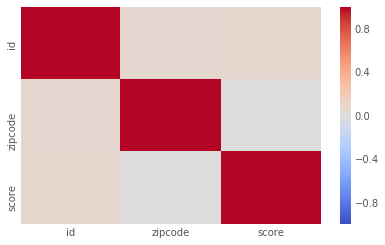

In [18]:
sns.heatmap(data.corr(), cmap="coolwarm", vmin=-1)

# Null Values



In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385670 entries, 0 to 385669
Data columns (total 18 columns):
id                385670 non-null int64
name              385219 non-null object
location          385670 non-null object
bldg_num          385430 non-null object
street            385666 non-null object
zipcode           379777 non-null float64
phone             385667 non-null object
cuisine           385670 non-null object
inspect_date      385670 non-null object
action            384475 non-null object
violation_code    379762 non-null object
violation_desc    377671 non-null object
critical_flag     385670 non-null object
score             366617 non-null float64
grade             194784 non-null object
grade_date        193295 non-null object
record_date       385670 non-null object
inspect_type      384475 non-null object
dtypes: float64(2), int64(1), object(15)
memory usage: 53.0+ MB


In [20]:
null_values = data.isnull().sum().sort_values(ascending=False) #number of missing data
null_percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False) #percent missing

null_table = pd.concat([null_values, null_percent], axis=1, keys = ['Missing Data', 'Missing Percent'])
null_table

,Missing Data,Missing Percent
grade_date,192375,49.880727
grade,190886,49.494646
score,19053,4.940234
violation_desc,7999,2.074053
violation_code,5908,1.531880
zipcode,5893,1.527990
inspect_type,1195,0.309850
action,1195,0.309850
name,451,0.116939
bldg_num,240,0.062229


# Score Analysis

In [21]:
data.score.describe()

count    366617.000000
mean     19.554827    
std      13.928758    
min     -1.000000     
25%      11.000000    
50%      14.000000    
75%      25.000000    
max      156.000000   
Name: score, dtype: float64

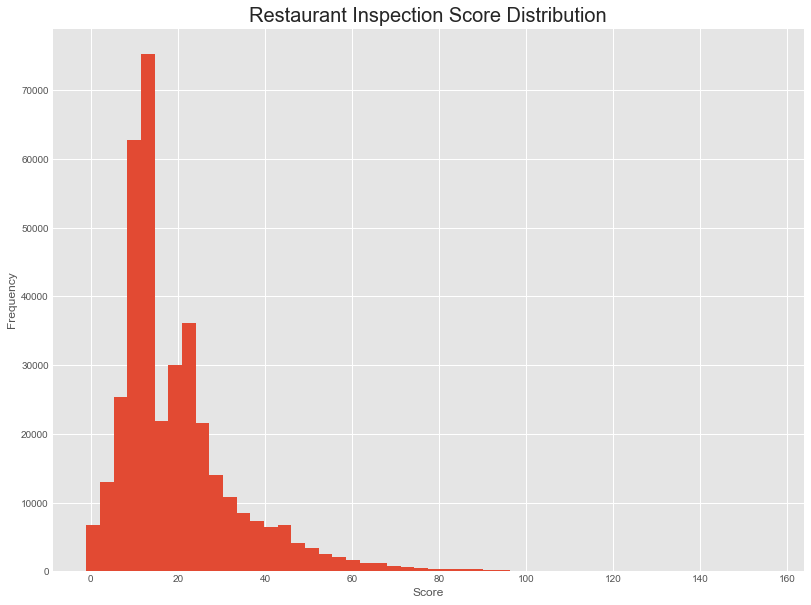

In [45]:
data.score.plot(kind='hist', bins=50,figsize=(12,10))
plt.title('Restaurant Inspection Score Distribution', size=20)
plt.xlabel('Score')
plt.ylabel('Frequency')
#plt.savefig('score_distribution.png')
plt.savefig('score_distribution.png', facecolor='w', transparent=False);


Most restaurants have a score between 10 and 30, inclusively. 

# Grade Analysis

In [23]:
data.grade.describe()

count     194784
unique    7     
top       A     
freq      154454
Name: grade, dtype: object

In [24]:
data.grade.value_counts()

A                 154454
B                 24754 
C                 7928  
Z                 3763  
P                 2389  
Not Yet Graded    1492  
G                 4     
Name: grade, dtype: int64

In [25]:
data.grade.value_counts().plot(kind = 'bar')
plt.title('Number of Restaurants by Grade')
plt.xlabel('Grade')
"• N= Not Yet Graded
• A = Grade A
• B = Grade B
• C = Grade C
• Z = Grade Pending
• P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure"
plt.ylabel('Frequency');

SyntaxError: EOL while scanning string literal (<ipython-input-25-c3af5738c475>, line 4)

• N= Not Yet Graded
• A = Grade A
• B = Grade B
• C = Grade C
• Z = Grade Pending
• P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure"

Most restaurants have a grade of A.



## Breakdown of Scores by Grade

In [ ]:
data.boxplot(column='score',by='grade',figsize=(15,10))
plt.title('Restaurant Scores by Grade')
plt.suptitle('')
plt.xlabel('Grade')
plt.ylabel('Score');

This shows that, generally, lower scores have better grades. 


# Borough Analysis

In [ ]:
data.location.value_counts() #boros with the highest number of restaurant inspections

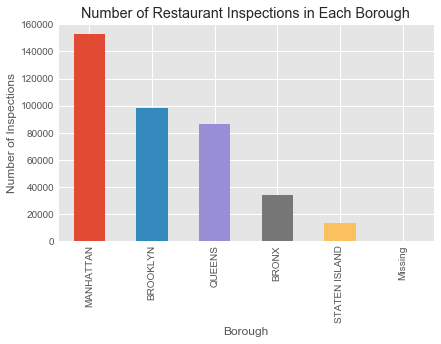

In [47]:
data.location.value_counts().plot(kind='bar')
plt.title('Number of Restaurant Inspections in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Inspections');

Manhattan has the highest number of restaurant inspections. 

## Breakdown of Scores by Boroughs

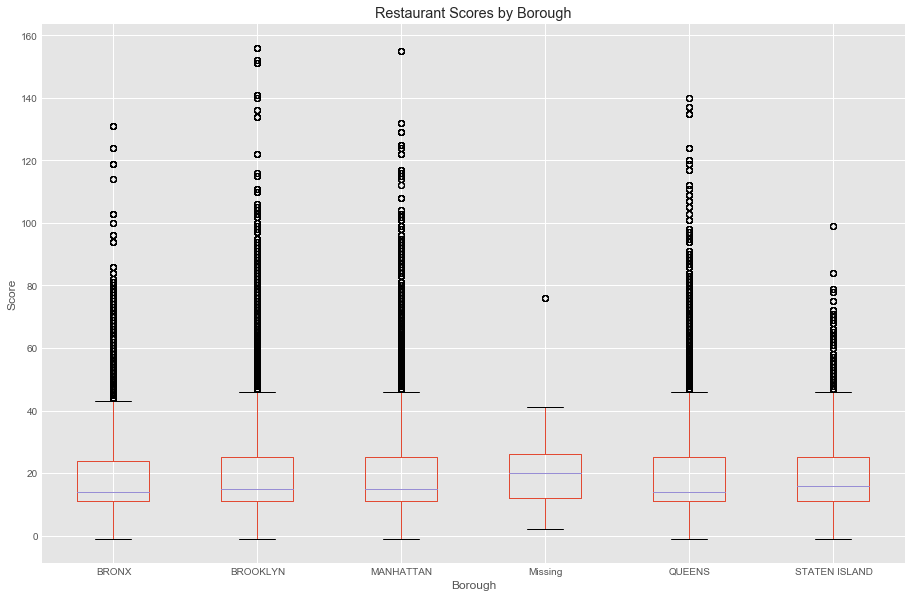

In [46]:
data.boxplot(column='score',by='location',figsize=(15,10))
plt.title('Restaurant Scores by Borough')
plt.suptitle('')
plt.xlabel('Borough')
plt.ylabel('Score');

There are similar score distributions for all the boroughs. 

## Breakdown of Grades by Borough

In [49]:
lg = pd.crosstab(data.grade, data.location)
lg

location,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
grade,,,,,,
A,13799,38050,61638,43,35172,5366
B,2415,6436,9277,9,5459,956
C,835,2072,3266,6,1711,232
G,0,2,2,0,0,0
Not Yet Graded,164,429,470,0,416,84
P,226,686,869,0,520,67
Z,414,963,1256,6,925,95


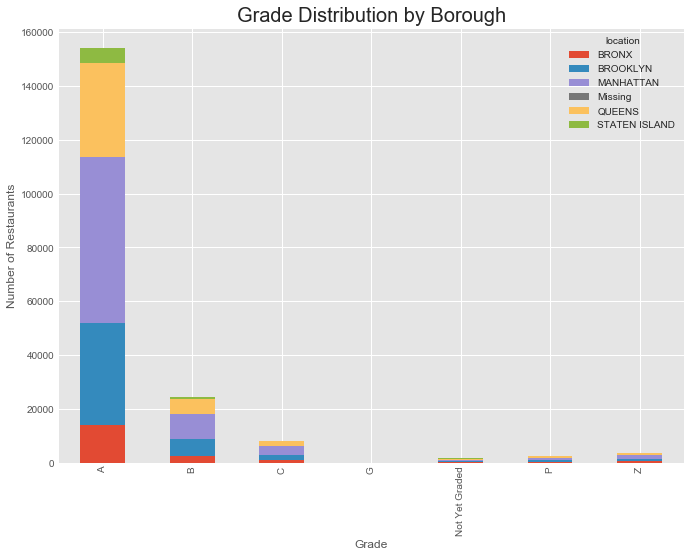

In [53]:
lg.plot(kind="bar", figsize=(10,8), stacked=True)
plt.title('Grade Distribution by Borough', size=20)
plt.xlabel('Grade')
plt.ylabel('Number of Restaurants')
plt.savefig('grade_dist_by_borough', facecolor='w', transparent=False);

It appears that most restaurant inspections result in a grade A across all boroughs. 

# Cuisine Analysis

In [151]:
data.cuisine.value_counts()

American                                                            83503
Chinese                                                             39957
CafÃ©/Coffee/Tea                                                    18047
Pizza                                                               17279
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16811
Italian                                                             15949
Mexican                                                             15374
Japanese                                                            13636
Caribbean                                                           13528
Bakery                                                              11818
Spanish                                                             11627
Pizza/Italian                                                       8389 
Chicken                                                             6859 
Indian                                

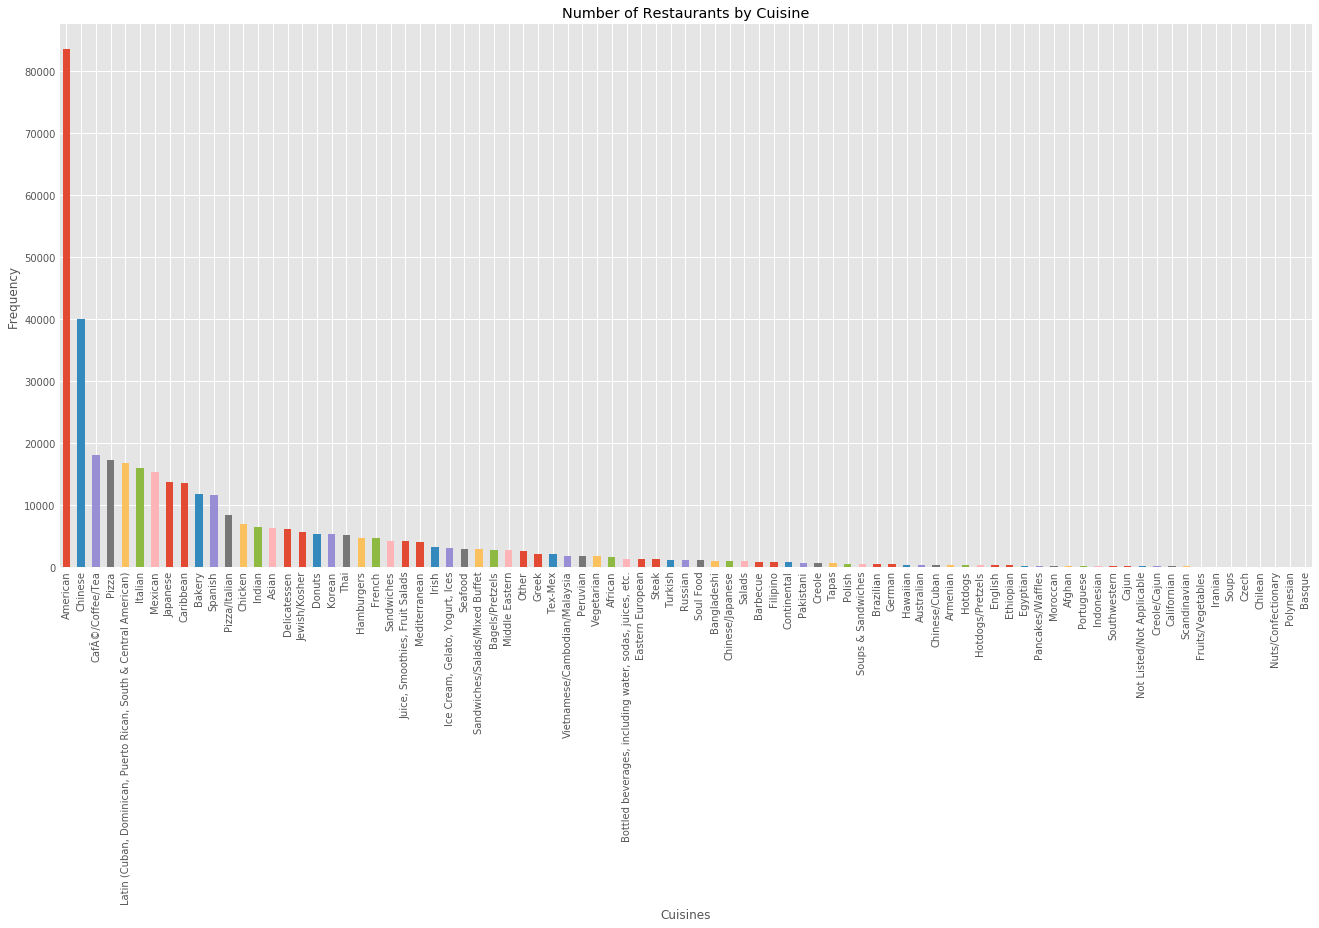

In [152]:
data.cuisine.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Number of Restaurants by Cuisine')
plt.xlabel('Cuisines')
plt.ylabel('Frequency');

There are more than twice as many American restaurants than any other type of cuisine. 

## Breakdown of Scores by Cuisine

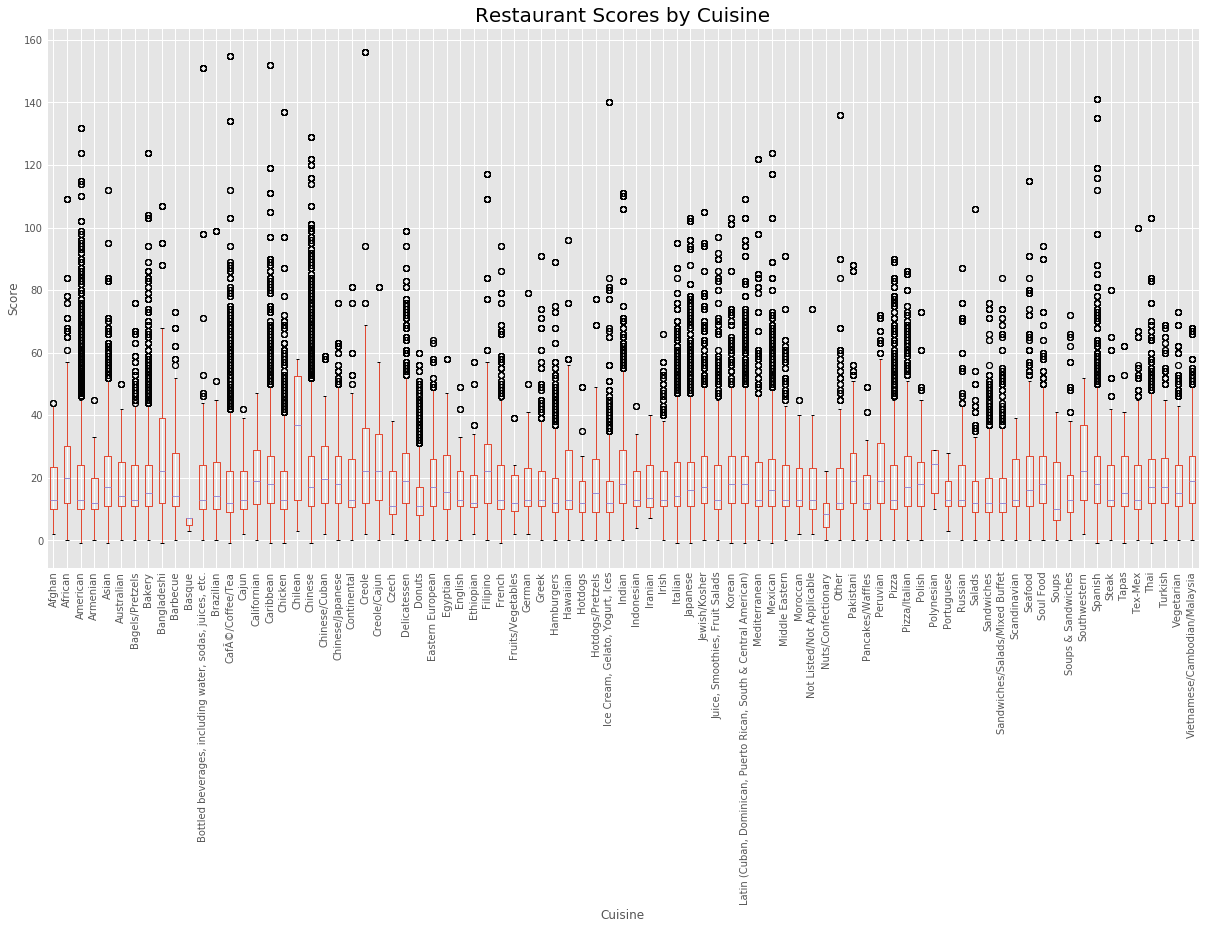

In [153]:
data.boxplot(column='score',by='cuisine',figsize=(20,10))
plt.title('Restaurant Scores by Cuisine', fontsize=20)
plt.suptitle('')
plt.xlabel('Cuisine')
plt.ylabel('Score')
plt.xticks(rotation=90);

# Action Analysis

In [154]:
 data.action.value_counts()

Violations were cited in the following area(s).                                                                                        361617
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.    13083 
No violations were recorded at the time of this inspection.                                                                            4634  
Establishment re-opened by DOHMH                                                                                                       3775  
Establishment re-closed by DOHMH                                                                                                       1366  
Name: action, dtype: int64

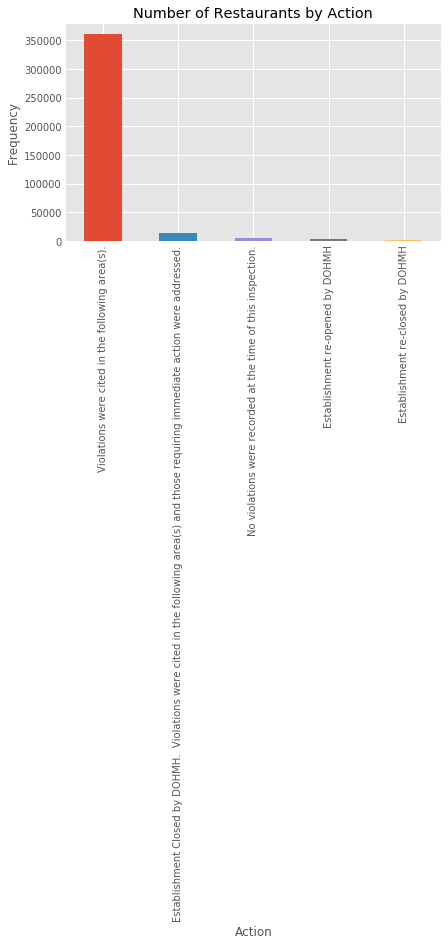

In [163]:
data.action.value_counts().plot(kind='bar')
plt.title('Number of Restaurants by Action')
plt.xlabel('Action')
plt.ylabel('Frequency');

The action with the highest frequency is citing violations. 

# Critical Flag Analysis

In [156]:
data.critical_flag.value_counts()


Critical          211216
Not Critical      166455
Not Applicable    7999  
Name: critical_flag, dtype: int64

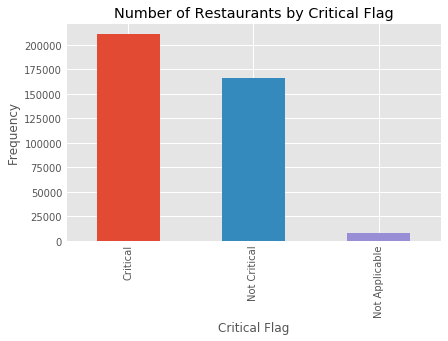

In [157]:
data.critical_flag.value_counts().plot(kind='bar')
plt.title('Number of Restaurants by Critical Flag')
plt.xlabel('Critical Flag')
plt.ylabel('Frequency');

Most restaurants received critical flags. 

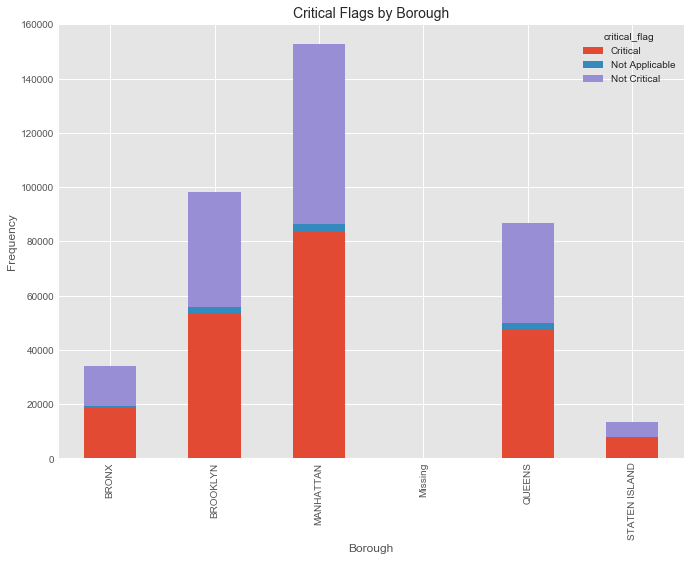

In [58]:
pd.crosstab(data.location, data.critical_flag).plot(kind="bar",figsize=(10,8), stacked=True)
plt.title('Critical Flags by Borough', size=14)
plt.xlabel('Borough')
plt.ylabel('Frequency')
plt.savefig('critical_flags_by_borough', facecolor='w', transparent=False);

There are more critical flags across all the boroughs. 

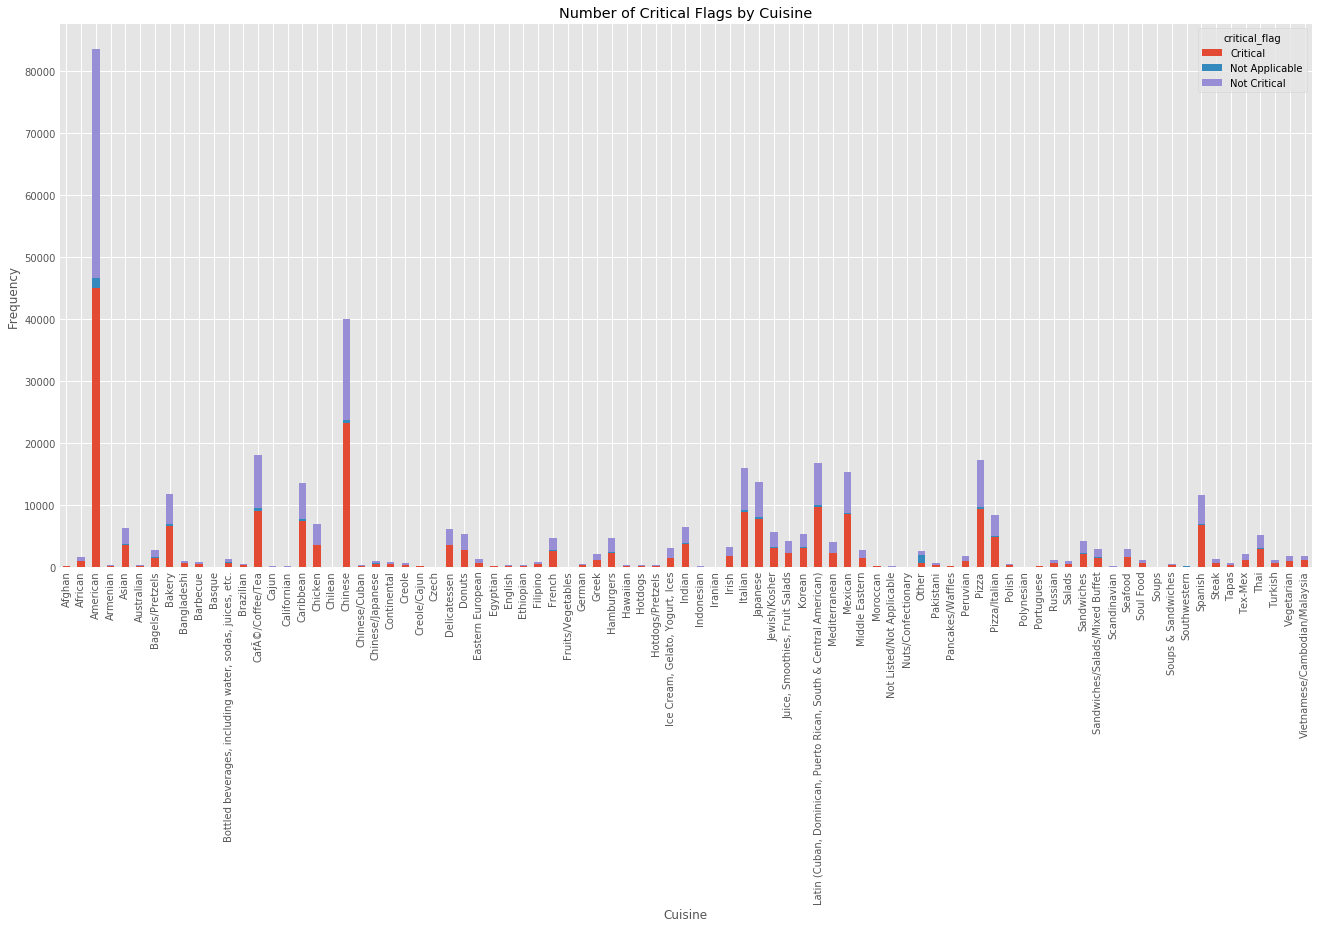

In [165]:
pd.crosstab(data.cuisine, data.critical_flag).plot(kind="bar", figsize=(20,10), stacked=True)
plt.title('Number of Critical Flags by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Frequency');


American cuisine has the highest number of critical flags. 

## Breakdown of Scores by Critical Flag

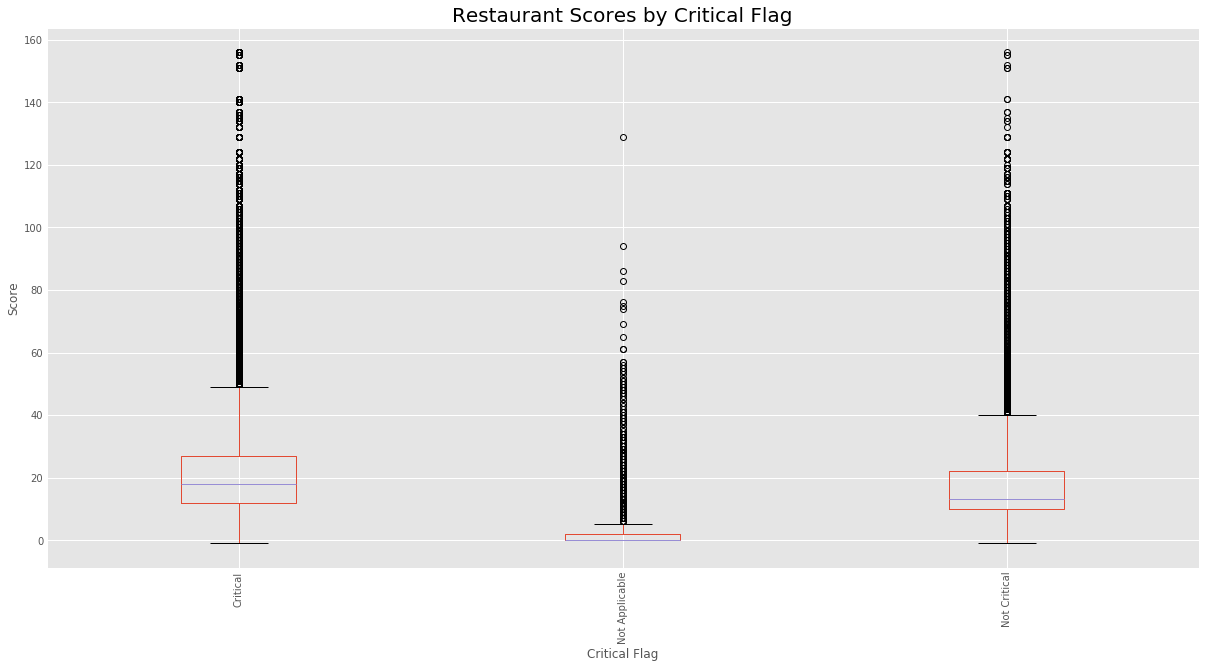

In [160]:
data.boxplot(column='score',by='critical_flag',figsize=(20,10))
plt.title('Restaurant Scores by Critical Flag', fontsize=20)
plt.suptitle('')
plt.xlabel('Critical Flag')
plt.ylabel('Score')
plt.xticks(rotation=90);

It appears that restaurants with higher scores tend to get critical flags. 

# Inspection Analysis

In [161]:
data.inspect_type.value_counts()

Cycle Inspection / Initial Inspection                          221282
Cycle Inspection / Re-inspection                               94007 
Pre-permit (Operational) / Initial Inspection                  26514 
Pre-permit (Operational) / Re-inspection                       12161 
Administrative Miscellaneous / Initial Inspection              7076  
Cycle Inspection / Reopening Inspection                        4336  
Pre-permit (Non-operational) / Initial Inspection              3678  
Smoke-Free Air Act / Initial Inspection                        3144  
Administrative Miscellaneous / Re-inspection                   2240  
Trans Fat / Initial Inspection                                 2124  
Pre-permit (Operational) / Compliance Inspection               1189  
Calorie Posting / Initial Inspection                           1141  
Cycle Inspection / Compliance Inspection                       1019  
Inter-Agency Task Force / Initial Inspection                   974   
Pre-permit (Operatio

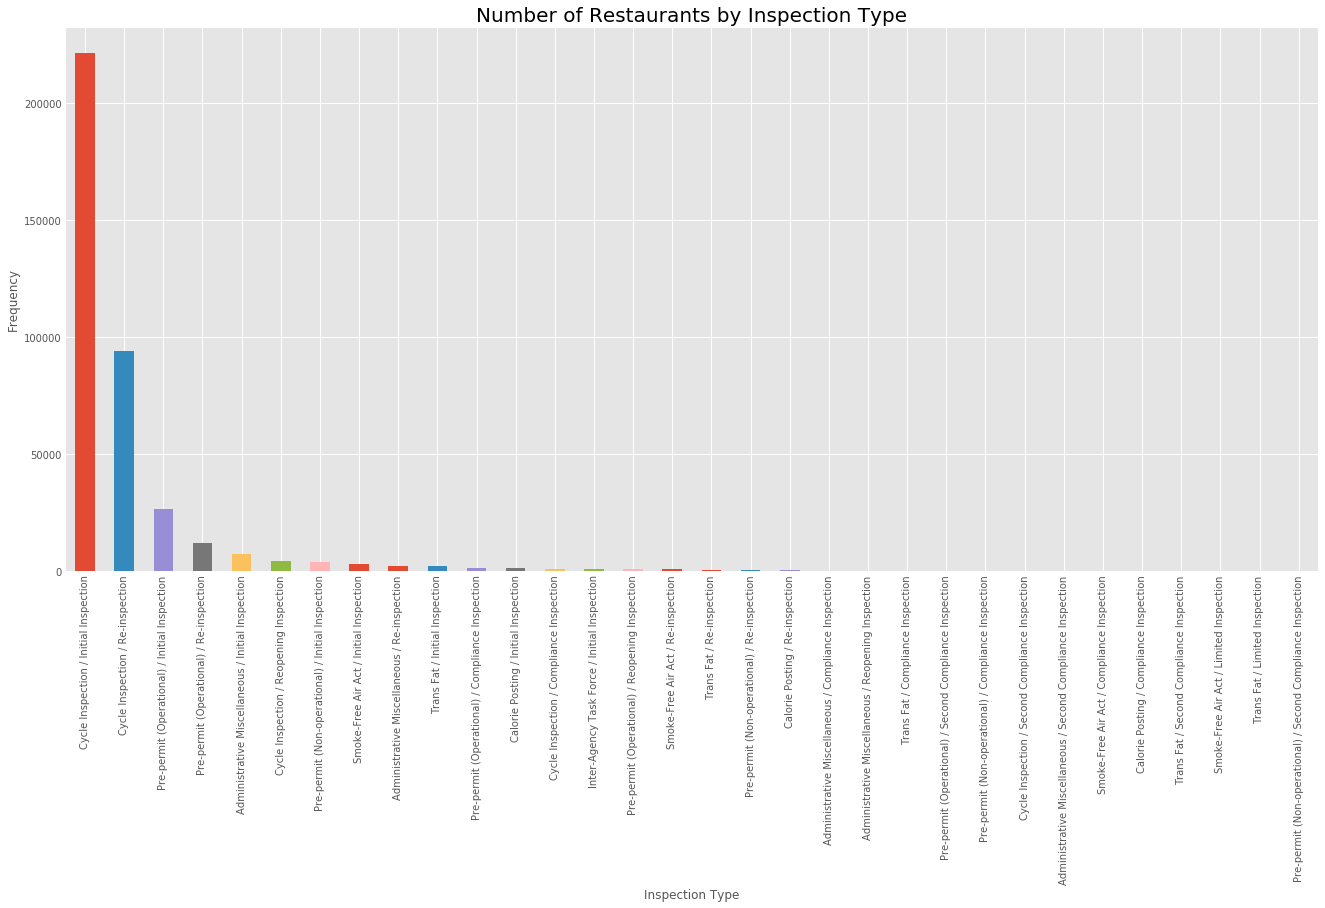

In [166]:
data.inspect_type.value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Number of Restaurants by Inspection Type', fontsize=20)
plt.suptitle('')
plt.xlabel('Inspection Type')
plt.ylabel('Frequency');

The most common type of inspection were cycle inspections/initial inspections. 

In [1]:
sns.heatmap(bikes.corr(), cmap="coolwarm", vmin=-1)

NameError: name 'sns' is not defined

In [73]:
data.groupby('violation_code')['violation_desc'].value_counts().sort_values(ascending=False)

violation_code  violation_desc                                                                                                                                                                                                                                                                                   
10F             Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      54151
08A             Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                   41583
04L             Evidence of mice or live mice present in facilit

In [81]:
data[data['name']=='IZAKAYA']

,id,name,location,bldg_num,street,zipcode,phone,cuisine,inspect_date,action,violation_code,violation_desc,critical_flag,score,grade,grade_date,record_date,inspect_type
